# Machine Learning DSIT UOA

### Assignment 1 - iii - Ridge Regression

### Actual Results

*Importing required modules*

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

*Function to generate our Input &"Experimental" Results in arrays*

In [ ]:
def x_y_actual(t0, t1, t2, t3, t5, r_step, r__start, r__end):

    x = np.linspace(r__start, r__end, num= N)             #input range [0,2] including 2 
    noise = np.random.normal(mu,sigma, size=(N,))         #adding random noise of input data
    y = t5*x**5 + t3*x**3 + t2*x**2 + t1*x + t0 + noise   

    return(x, y)

*Actual polynomial model parameters and Sample range*


In [ ]:
#polynomial weights
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

#Input data range
r_start = 0
r_end = 2
N  = 20
step = (r_end - r_start) / N

mu, sigma = 0, 0.1    # mean and standard deviation of Input noise

*Assign values to {x, y} set*

In [ ]:
x, y = x_y_actual(th0, th1, th2, th3, th5, step, r_start, r_end)

### Predicted Results
*Compute parameters from Input data using 5th degree polynomial model*

*Parameters*

In [ ]:
poly_deg = 5
lamda = 0.03

*Build vector **X** ([1  x  x^2  x^3  x^5] in range [0,2] to use for trainning*

In [ ]:
Q_train = np.zeros(shape = (N,poly_deg+1))
Q_train[:,0] = 1
for i in range(1,poly_deg+1):
    if i!=4:         #we do not want term x^4 to contribute

      Q_train[:,i] = np.power(x,i).reshape((N,))   #x^5+x^3+...


*Parameter "Θ" Calculation*

In [ ]:
#closed form solution for theta = ((X.T * X + λΙ)^-1) * Χ.Τ * Υ
theta = np.linalg.pinv((Q_train.T.dot(Q_train) + lamda*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)
theta


array([ 0.11421279, -0.6994858 ,  0.34268871,  1.08719671,  0.        ,
       -0.24703415])

In [ ]:
theta_per

array([-0.01531036, -0.26053155,  0.32647789,  0.80220436,  0.        ,
       -0.19397569])

*Check MSE behaviour vs different values of lamda*

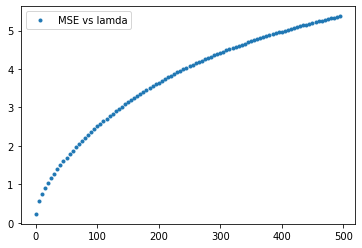

In [ ]:
import math

sample_shp = 100

# Initialize arrays
mse = np.zeros(shape= sample_shp)
log_mse = np.zeros(shape= sample_shp)

# Define lamda values range & density
l_str = 0
l_end = 500
step_l = (l_end - l_str) / sample_shp
lamd_range = np.arange(l_str ,l_end, step_l)  #1,2,3...10

for lamda in range(len(lamd_range)):

    #closed form solution for theta = ((X.T * X + λΙ)^-1) * Χ.Τ * Υ
  theta = np.linalg.pinv((Q_train.T.dot(Q_train) + lamda*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)

  prev = 0 
  
  for k in range(len(y)):
  
    mse[lamda] = prev + pow(Q_train.dot(theta)[k] - y[k],2)  
    prev =  mse[lamda]
  
    for j in mse:
       log_mse[lamda] = math.log(mse[lamda])


#Plot to see the dependency
plt.plot(lamd_range, mse, marker='.',linewidth=0, label='MSE vs lamda')
plt.legend()
plt.show()


# **WTF???**